# 1. Importando Bibliotecas

In [2]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

     |████████████████████████████████| 6.3MB 6.4MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=d59dead95e8f958c06da012958a984d1fc5714cbe691eed70b38747f997cf26f
  Stored in directory: /tmp/pip-ephem-wheel-cache-4fzwi5zm/wheels/fe/a0/79/b73d4a0c535b421b88fc7b393936b371fabbfeaf979eca4050
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import random

# 2. Obtendo e tratando os dados

In [4]:
tickers_ibov = "ABEV3.SA AZUL4.SA B3SA3.SA BBAS3.SA BBDC3.SA BBDC4.SA BBSE3.SA BPAC11.SA BRAP4.SA BRDT3.SA BRFS3.SA BRKM5.SA BRML3.SA BTOW3.SA CCRO3.SA CIEL3.SA CMIG4.SA COGN3.SA CRFB3.SA CSAN3.SA CSNA3.SA CVCB3.SA CYRE3.SA ECOR3.SA EGIE3.SA ELET3.SA ELET6.SA EMBR3.SA ENBR3.SA EQTL3.SA FLRY3.SA GGBR4.SA GNDI3.SA GOAU4.SA GOLL4.SA HAPV3.SA HGTX3.SA HYPE3.SA IGTA3.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA KLBN11.SA LAME4.SA LREN3.SA MGLU3.SA MRFG3.SA MRVE3.SA MULT3.SA NTCO3.SA PCAR4.SA PETR3.SA PETR4.SA QUAL3.SA RADL3.SA RAIL3.SA RENT3.SA SANB11.SA SBSP3.SA SMLS3.SA SULA11.SA SUZB3.SA TAEE11.SA TIMP3.SA TOTS3.SA UGPA3.SA USIM5.SA VALE3.SA VIVT4.SA VVAR3.SA WEGE3.SA YDUQ3.SA"

dados_yahoo = yf.download(tickers=tickers_ibov, period='1y')['Adj Close']

ibov = yf.download('BOVA11.SA', period='1y')['Adj Close']
ibov = ibov / ibov.iloc[0]


[*********************100%***********************]  73 of 73 completed

3 Failed downloads:
- VIVT4.SA: No data found, symbol may be delisted
- PCAR4.SA: No data found, symbol may be delisted
- TIMP3.SA: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


In [5]:
dados_yahoo.dropna(how='all', inplace=True)
dados_yahoo.dropna(axis=1, inplace=True, thresh=246)

In [ ]:
dados_yahoo

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,KLBN11.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,NTCO3.SA,PETR3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SANB11.SA,SBSP3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-08,14.263099,21.530001,19.261818,32.008430,17.791965,19.467609,27.026299,20.962559,34.231186,21.078838,20.910000,25.350000,10.87,115.021111,14.895993,4.875517,9.013909,7.66,19.691183,18.592602,11.209207,17.924519,24.102444,14.90,41.280319,30.182861,30.590698,8.180000,17.043268,23.210648,25.530708,15.509705,64.138985,7.114692,19.840000,12.076623,14.981697,31.658234,35.225594,8.392826,9.831720,26.303820,21.892700,21.000000,31.777328,43.184387,19.030289,13.162030,19.309010,22.421469,42.320000,22.325556,21.912079,28.327568,22.392031,23.129999,44.139339,28.244934,58.203819,42.234646,36.150002,24.757383,24.099831,18.343189,7.653695,51.628662,16.370001,26.919970,34.007286
2020-07-09,14.195226,20.900000,18.702862,31.886374,17.566967,19.034029,26.749739,20.434797,33.908859,20.931948,20.700001,23.570000,11.03,119.775040,14.161959,4.778007,9.068777,7.78,19.167984,18.224407,10.932924,18.159748,24.246660,14.41,41.062099,32.777603,33.464100,7.990000,16.862865,23.028458,24.976749,15.597164,64.456757,7.076077,19.709999,11.919500,14.942323,31.453926,35.791187,8.374816,9.860722,26.313585,21.524918,20.639999,34.992657,43.689526,19.700195,12.934587,19.414154,22.931717,42.150002,21.684128,21.418694,28.023565,22.394020,22.850000,43.056229,27.766207,57.609398,41.940174,36.470001,24.627985,24.862862,18.167282,7.425079,50.818024,17.549999,26.999292,34.036816
2020-07-10,14.398846,21.910000,19.039509,32.055386,17.696774,19.311520,26.435038,21.061207,34.590355,20.757517,20.600000,23.600000,11.27,119.834839,14.191320,4.787758,9.029587,8.64,19.215549,18.385029,11.080933,20.700232,25.265202,14.29,40.739529,32.340694,32.792164,8.060000,16.824884,23.431120,24.724068,15.645754,63.304855,7.066425,20.900000,12.026900,15.887291,31.434467,36.257557,8.284764,9.889725,26.557680,22.105625,20.450001,34.784897,43.986668,19.893724,13.132363,20.618578,22.961153,42.029999,22.019203,21.776640,27.314222,22.015812,22.840000,43.264904,27.794931,58.174099,42.529125,36.680000,24.576229,24.843042,18.089102,7.385319,51.313416,17.620001,27.118273,34.991577
2020-07-13,13.574670,21.160000,19.020452,31.736149,17.341978,19.042700,26.110798,20.952696,35.133701,20.197495,20.080000,23.240000,10.81,116.605759,13.927068,4.856015,9.147158,8.68,18.882607,18.083553,11.515092,21.189510,23.922171,13.85,41.745209,31.306360,32.031818,8.160000,16.729937,22.913412,24.908718,15.801242,61.269169,7.153306,20.170000,11.726577,15.316374,31.230156,35.106525,8.753033,9.706044,26.167126,21.524918,20.020000,33.785671,42.362301,19.973122,12.855476,20.073721,22.490156,39.900002,21.875601,21.438042,27.443195,21.802818,22.230000,41.834000,27.182159,56.331390,41.922325,36.060001,24.541725,24.446663,17.297520,7.345560,51.925896,17.650000,27.237259,33.446239
2020-07-14,13.487403,21.750000,19.417439,32.252567,17.584278,19.363550,26.044043,20.567970,37.500507,20.876863,20.100000,23.700001,10.85,115.300171,13.966217,4.778007,8.943366,8.62,18.920656,18.412212,12.028190,21.358875,24.228634,14.03,41.166466,31.029943,31.943407,8.010000,16.597008,22.721668,24.908718,16.131649,63.662338,7.365685,20.520000,11.911544,15.080131,30.840998,35.027142,9.062531,9.822052,26.606501,21.302313,20.400000,34.280338,41.510494,19.973122,12.726921,19.939898,22.441093,39.680000,22.631912,22.153933,26.899675,21.926235,22.240000,43.622631,27.57471

In [6]:
retorno = dados_yahoo.pct_change()
retorno

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,KLBN11.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,NTCO3.SA,PETR3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SANB11.SA,SBSP3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-09,-0.004759,-0.029262,-0.029019,-0.003813,-0.012646,-0.022272,-0.010233,-0.025176,-0.009416,-0.006969,-0.010043,-0.070217,0.014719,0.041331,-0.049277,-0.020000,0.006087,0.015666,-0.026570,-0.019803,-0.024648,0.013123,0.005983,-0.032886,-0.005286,0.085967,0.093931,-0.023227,-0.010585,-0.007849,-0.021698,0.005639,0.004954,-0.005428,-0.006552,-0.013010,-0.002628,-0.006454,0.016056,-0.002146,0.002950,0.000371,-0.016799,-0.017143,0.101183,0.011697,0.035202,-0.017280,0.005445,0.022757,-0.004017,-0.028731,-0.022517,-0.010732,0.000089,-0.012105,-0.024538,-0.016949,-0.010213,-0.006972,0.008852,-0.005227,0.031661,-0.009590,-0.029870,-0.015701,0.072083,0.002947,0.000868
2020-07-10,0.014344,0.048325,0.018000,0.005300,0.007389,0.014579,-0.011765,0.030654,0.020098,-0.008333,-0.004831,0.001273,0.021759,0.000499,0.002073,0.002041,-0.004321,0.110540,0.002482,0.008814,0.013538,0.139896,0.042007,-0.008328,-0.007856,-0.013329,-0.020079,0.008761,-0.002252,0.017485,-0.010117,0.003115,-0.017871,-0.001364,0.060375,0.009010,0.063241,-0.000619,0.013030,-0.010753,0.002941,0.009276,0.026978,-0.009205,-0.005937,0.006801,0.009824,0.015291,0.062038,0.001284,-0.002847,0.015453,0.016712,-0.025312,-0.016889,-0.000438,0.004847,0.001035,0.009802,0.014043,0.005758,-0.002102,-0.000797,-0.004303,-0.005355,0.009748,0.003989,0.004407,0.028051
2020-07-13,-0.057239,-0.034231,-0.001001,-0.009959,-0.020049,-0.013920,-0.012266,-0.005152,0.015708,-0.026979,-0.025243,-0.015254,-0.040816,-0.026946,-0.018621,0.014257,0.013021,0.004630,-0.017327,-0.016398,0.039181,0.023636,-0.053157,-0.030791,0.024686,-0.031982,-0.023187,0.012407,-0.005643,-0.022095,0.007468,0.009938,-0.032157,0.012295,-0.034928,-0.024971,-0.035935,-0.006500,-0.031746,0.056522,-0.018573,-0.014706,-0.026270,-0.021027,-0.028726,-0.036929,0.003991,-0.021084,-0.026426,-0.020513,-0.050678,-0.006522,-0.015549,0.004722,-0.009675,-0.026708,-0.033073,-0.022046,-0.031676,-0.014268,-0.016903,-0.001404,-0.015955,-0.043760,-0.005384,0.011936,0.001703,0.004388,-0.044163
2020-07-14,-0.006429,0.027883,0.020872,0.016272,0.013972,0.016849,-0.002557,-0.018362,0.067366,0.033636,0.000996,0.019794,0.003700,-0.011197,0.002811,-0.016064,-0.022279,-0.006912,0.002015,0.018174,0.044559,0.007993,0.012811,0.012996,-0.013864,-0.008829,-0.002760,-0.018382,-0.007946,-0.008368,0.000000,0.020910,0.039060,0.029690,0.017353,0.015773,-0.015424,-0.012461,-0.002261,0.035359,0.011952,0.016791,-0.010342,0.018981,0.014641,-0.020108,0.000000,-0.010000,-0.006667,-0.002182,-0.005514,0.034573,0.033393,-0.019805,0.005661,0.000450,0.042755,0.014442,-0.001055,0.013410,0.016639,-0.002812,0.000405,0.064407,0.017591,0.070252,0.005666,-0.017292,0.015303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-02,0.013372,0.017288,0.006127,0.011010,0.016522,0

In [7]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,KLBN11.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,NTCO3.SA,PETR3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SANB11.SA,SBSP3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-07-09,0.995241,0.970738,0.970981,0.996187,0.987354,0.977728,0.989767,0.974824,0.990584,0.993031,0.989957,0.929783,1.014719,1.041331,0.950723,0.980000,1.006087,1.015666,0.973430,0.980197,0.975352,1.013123,1.005983,0.967114,0.994714,1.085967,1.093931,0.976773,0.989415,0.992151,0.978302,1.005639,1.004954,0.994572,0.993448,0.986990,0.997372,0.993546,1.016056,0.997854,1.002950,1.000371,0.983201,0.982857,1.101183,1.011697,1.035202,0.982720,1.005445,1.022757,0.995983,0.971269,0.977483,0.989268,1.000089,0.987895,0.975462,0.983051,0.989787,0.993028,1.008852,0.994773,1.031661,0.990410,0.970130,0.984299,1.072083,1.002947,1.000868
2020-07-10,1.009517,1.017650,0.988459,1.001467,0.994650,0.991982,0.978123,1.004706,1.010492,0.984756,0.985175,0.930966,1.036799,1.041851,0.952694,0.982000,1.001739,1.127937,0.975845,0.988836,0.988556,1.154856,1.048242,0.959060,0.986900,1.071492,1.071965,0.985330,0.987187,1.009499,0.968405,1.008772,0.986995,0.993216,1.053427,0.995883,1.060447,0.992932,1.029296,0.987125,1.005900,1.009651,1.009726,0.973810,1.094645,1.018578,1.045372,0.997746,1.067822,1.024070,0.993147,0.986278,0.993819,0.964228,0.983199,0.987462,0.980189,0.984068,0.999489,1.006972,1.014661,0.992683,1.030839,0.986148,0.964935,0.993894,1.076359,1.007366,1.028944
2020-07-13,0.951734,0.982815,0.987469,0.991493,0.974708,0.978174,0.966126,0.999529,1.026365,0.958188,0.960306,0.916765,0.994480,1.013777,0.934954,0.996000,1.014783,1.133159,0.958937,0.972621,1.027289,1.182152,0.992521,0.929530,1.011262,1.037223,1.047110,0.997555,0.981616,0.987194,0.975638,1.018797,0.955256,1.005427,1.016633,0.971015,1.022339,0.986478,0.996620,1.042918,0.987217,0.994803,0.983201,0.953333,1.063200,0.980963,1.049544,0.976709,1.039604,1.003063,0.942817,0.979846,0.978366,0.968780,0.973687,0.961090,0.947771,0.962373,0.967830,0.992605,0.997510,0.991289,1.014391,0.942994,0.959740,1.005757,1.078192,1.011786,0.983502
2020-07-14,0.945615,1.010218,1.008079,1.007627,0.988327,0.994655,0.963656,0.981177,1.095507,0.990418,0.961263,0.934911,0.998160,1.002426,0.937582,0.980000,0.992174,1.125326,0.960869,0.990298,1.073063,1.191601,1.005236,0.941611,0.997242,1.028065,1.044220,0.979218,0.973816,0.978933,0.975638,1.040100,0.992569,1.035278,1.034274,0.986331,1.006570,0.974186,0.994366,1.079795,0.999017,1.011507,0.973033,0.971429,1.078767,0.961238,1.049544,0.966942,1.032673,1.000875,0.937618,1.013722,1.011037,0.949594,0.979198,0.961522,0.988294,0.976271,0.966808,1.005916,1.014108,0.988502,1.014803,1.003729,0.976623,1.076413,1.084300,0.994291,0.998553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

# 3. Resultados


In [8]:
carteira = random.choices(dados_yahoo.columns, k=5)
carteira = 10000 * retorno_acumulado.loc[ : , carteira]
carteira['saldo'] = carteira.sum(axis=1)
carteira['retorno'] = carteira['saldo'].pct_change()
carteira

,NTCO3.SA,AZUL4.SA,KLBN11.SA,USIM5.SA,BRFS3.SA,saldo,retorno
Date,,,,,,,
2020-07-08,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2020-07-09,9959.830300,9707.384557,9828.571138,9701.299523,9899.570021,49096.655540,-0.018067
2020-07-10,9931.474263,10176.497514,9738.095601,9649.350612,9851.745831,49347.163822,0.005102
2020-07-13,9428.166780,9828.146388,9533.333551,9597.402947,9603.060770,47990.110436,-0.027500
2020-07-14,9376.181614,10102.182678,9714.285533,9766.233949,9612.625791,48571.509565,0.012115
...,...,...,...,...,...,...,...
2021-07-02,14064.272421,20771.017090,12719.047183,25517.087387,12845.528841,85916.952922,0.014509
2021-07-05,14168.241852,20599.162592,12823.809669,25556.282546,12745.097950,85892.594608,-0.000284
2021-07-06,14094.991010,19739.897187,12709.524064,25451.757969,12635.102950,84631.273181,-0.014685


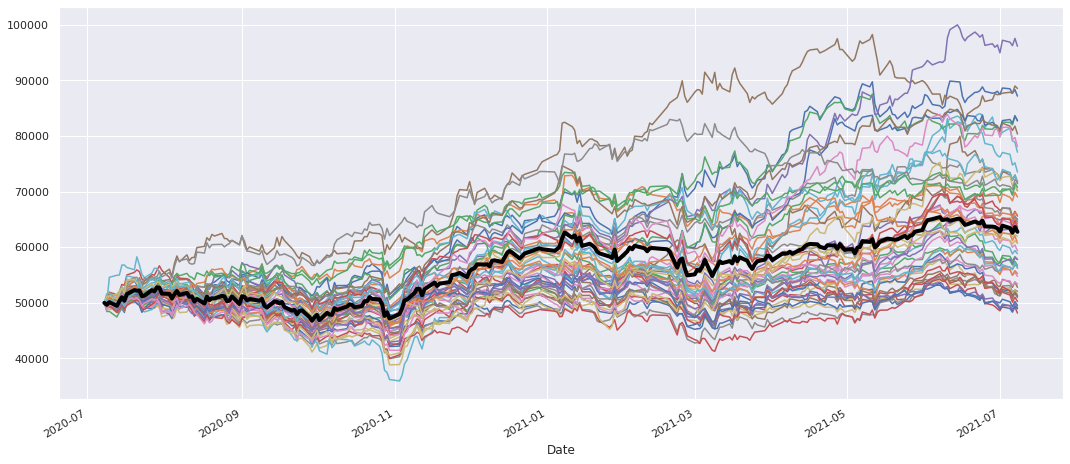

In [9]:
for i in range(50):
  carteira = random.choices(dados_yahoo.columns, k=5)
  carteira = 10000 * retorno_acumulado.loc[ : , carteira]
  carteira['saldo'] = carteira.sum(axis=1)
  
  carteira['saldo'].plot(figsize=(18,8))
 
(ibov*50000).plot(linewidth=4, color='black')
